In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("../datasets/Outliers/bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


We will quickly examine price_per_sqft column to check min,max,mean and percentile values

In [5]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

Also **plot histogram** to see how is the data distribution

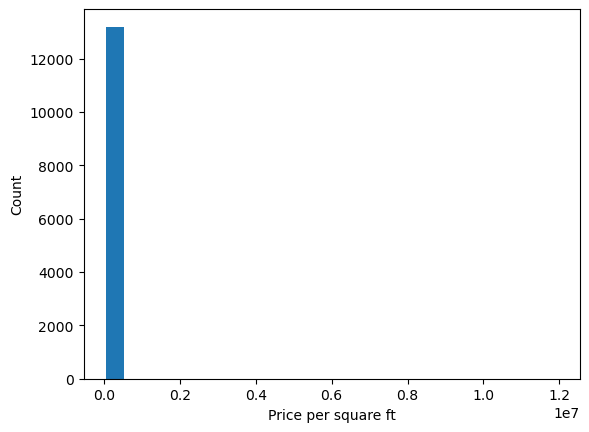

In [6]:
plt.hist(df['price_per_sqft'], bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using **log scale** can make visualization little better

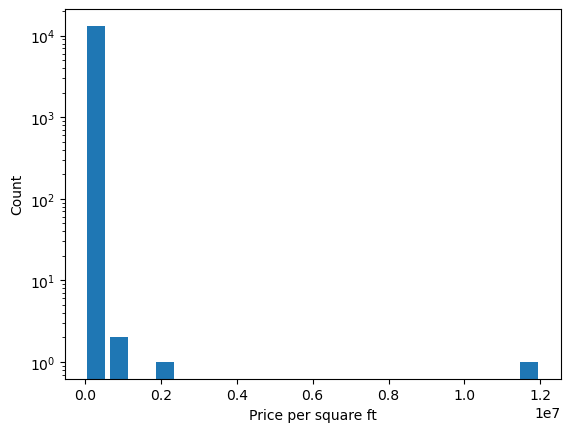

In [7]:
plt.hist(df['price_per_sqft'], bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building at least :)

<h3 style='color:purple'>(1) Treat outliers using percentile first</h3>

In [8]:
lower_limit, upper_limit = df['price_per_sqft'].quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [9]:
outliers = df[(df['price_per_sqft']>upper_limit) | (df['price_per_sqft']<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
7012,other,1 BHK,650.0,1.0,500.0,1,76923
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) 
Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [10]:
df2 = df[(df['price_per_sqft']<upper_limit) & (df['price_per_sqft']>lower_limit)]
df2.shape

(13172, 7)

In [11]:
df.shape

(13200, 7)

In [12]:
df.shape[0] - df2.shape[0]

28

**We removed total 28 outliers**

<h3 style='color:purple'>(2) Now remove outliers using 4 standard deviation</h3>

In [13]:
max_limit = df2['price_per_sqft'].mean() + 4*df2['price_per_sqft'].std()
min_limit = df2['price_per_sqft'].mean() - 4*df2['price_per_sqft'].std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [14]:
df2[(df2['price_per_sqft']>max_limit) | (df2['price_per_sqft']<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6109,HRBR Layout,6 Bedroom,1000.0,6.0,275.0,6,27500
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
1770,other,10 Bedroom,1660.0,10.0,475.0,10,28614
4555,Judicial Layout,6 Bedroom,1200.0,6.0,300.0,6,25000
4357,other,4 Bedroom,3250.0,5.0,850.0,4,26153
13013,other,4 Bedroom,1200.0,5.0,350.0,4,29166
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
3675,Kasturi Nagar,5 Bedroom,1650.0,5.0,450.0,5,27272
1721,other,5 Bedroom,2400.0,5.0,625.0,5,26041
6959,Raja Rajeshwari Nagar,4 Bedroom,1350.0,4.0,340.0,4,25185


In [90]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [97]:
df2.shape[0]-df3.shape[0]

125

In this step we removed total 125 outliers

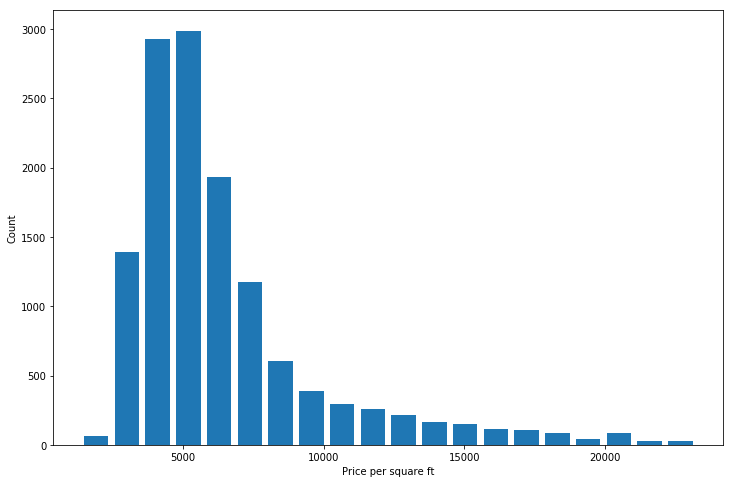

In [91]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

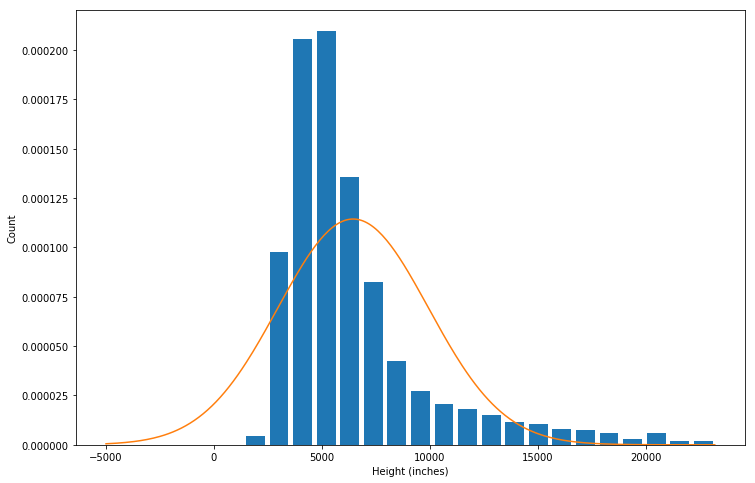

In [92]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

<h3 style='color:purple'>(3) Now remove outliers using z score. Use z score of 4 as your thresold</h3>

In [94]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
7075,Thanisandra,2 BHK,1200.0,2.0,53.5,2,4458,-0.532635
6649,Nagavara,2 BHK,936.0,2.0,40.2,2,4294,-0.572239
5863,other,1 Bedroom,1200.0,2.0,45.0,1,3750,-0.703608
4524,Kodigehalli,2 BHK,1200.0,2.0,48.0,2,4000,-0.643236
7089,Sarjapur,3 BHK,1364.0,2.0,56.0,3,4105,-0.617880
7128,Raja Rajeshwari Nagar,6 Bedroom,3900.0,6.0,195.0,6,5000,-0.401750
2889,LB Shastri Nagar,2 BHK,1043.0,2.0,55.0,2,5273,-0.335824
1149,Yeshwanthpur,3 BHK,1523.0,3.0,170.0,3,11162,1.086289
618,Whitefield,3 BHK,1720.0,3.0,100.0,3,5813,-0.205421
11279,Electronic City Phase II,4 BHK,2187.5,4.0,105.0,4,4800,-0.450047


In [98]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [99]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
3136,other,4 Bedroom,1200.0,4.0,350.0,4,29166,5.434010
6134,Basavangudi,6 Bedroom,1754.0,6.0,650.0,6,37058,7.339820
9099,Whitefield,3 BHK,1496.0,2.0,718.0,3,47994,9.980715
3675,Kasturi Nagar,5 Bedroom,1650.0,5.0,450.0,5,27272,4.976634
9360,HAL 2nd Stage,4 Bedroom,2280.0,4.0,615.0,4,26973,4.904430


In [100]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [101]:
df2.shape[0] - df4.shape[0]

125

In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation